# TP : parcours d'un arbre binaire

## Introduction

Un arbre binaire peut être parcouru afin de connaître les noeuds qu’il contient. On peut parcourir cet arbre verticalement, appelé parcours en profondeur, mais aussi horizontalement, appelé parcours en largeur.

Il y a trois façons distinctes de parcourir un arbre en profondeur.

- parcours **infixe** : on parcourt l’arbre gauche, on note la racine puis on parcourt l’arbre droit.
- parcours **préfixe** : on note la racine de l’arbre, ensuite on parcourt l’arbre gauche puis l’arbre droit.
- parcours **suffixe** : on parcourt l’arbre gauche, puis l’arbre droit et on note la racine.

Le parcours en largeur d'un arbre consiste à visiter chaque noeud par niveau, de la racine aux feuilles les plus profondes.

On donne l'arbre binaire ci-dessous

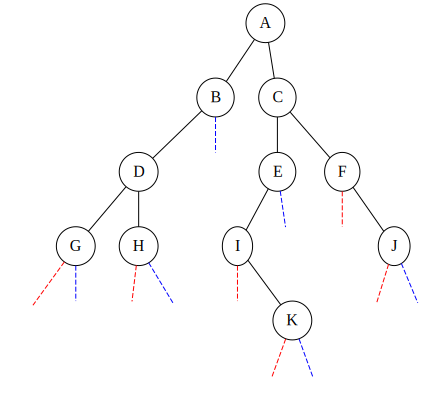

In [1]:
from arbre_binaire import Arbre, Noeud
from draw_arbre import afficher

a = Arbre(Noeud('A',\
                Noeud('B',\
                      Noeud('D',\
                            Noeud('G'),\
                            Noeud('H')),\
                      None),\
                Noeud('C',\
                      Noeud('E',\
                            Noeud('I',\
                                  None,\
                                  Noeud('K')),\
                            None),\
                      Noeud('F',\
                            None,\
                            Noeud('J')))))

afficher(a)

1. Les différents parcours sont :

- parcours infixe : G - D - H - B - A - I - K - E - C - F - J
- parcours prefixe : A - B - D - G - H - C - E - I - K - F - J
- parcours suffixe : G - H - D - B - K - I - E - J - F - C - A

2. Un arbre binaire de taille 6 a pour parcours infixe : 1 - 2 - 3 - 4 - 5 - 6. 

- Dans la première représentation, on prend 3 comme racine;
- Dans la seconde représentation, 6 est la racine, ce qui implique un sous arbre droit vide;
- Dans la dernière représentation, l'arbre est bien tassé.

On propose ces 3 arbres en Python :

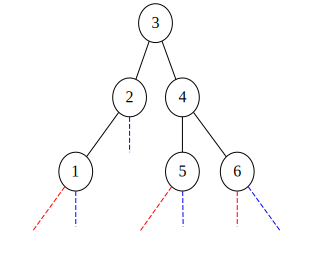

In [2]:
# Représentation de l'arbre (racine 3)
a_3 = Arbre(Noeud(3,\
                  Noeud(2,\
                        Noeud(1),\
                        None),\
                  Noeud(4,\
                        Noeud(5),\
                        Noeud(6))))

afficher(a_3)

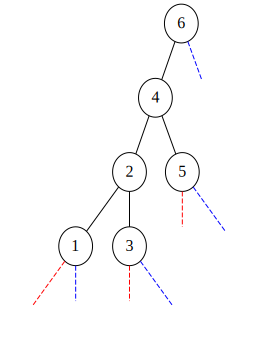

In [3]:
# Arbre de racine 6
a_6 = Arbre(Noeud(6,\
                  Noeud(4,\
                        Noeud(2,\
                             Noeud(1),\
                             Noeud(3)),\
                        Noeud(5)),\
                  None))

afficher(a_6)

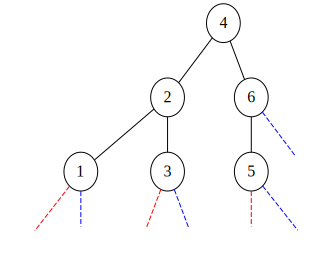

In [4]:
# Arbre bien tassé
a_bt = Arbre(Noeud(4,\
                  Noeud(2,\
                        Noeud(1),\
                        Noeud(3)),\
                  Noeud(6,\
                        Noeud(5),\
                        None)))

afficher(a_bt)

In [5]:
def parcours_infixe(arbre):
    if not(arbre.est_vide()):
        parcours_infixe(arbre.fils_gauche())
        print(arbre.racine.valeur, end = " - ")
        parcours_infixe(arbre.fils_droit())

parcours_infixe(a_bt)

1 - 2 - 3 - 4 - 5 - 6 - 

In [6]:
# version de fonction qui renvoie le parcours sous forme de chaine de caractères.

def parcours_infixe(arbre,parcours=""):
    if not(arbre.est_vide()):
        parcours=parcours_infixe(arbre.fils_gauche(),parcours)
        parcours+=str(arbre.racine.valeur) + "-"
        parcours=parcours_infixe(arbre.fils_droit(),parcours)
    return parcours

parcours_infixe(a_bt)

In [7]:
from file import creer_file

F= creer_file()

def parcours_infixe(arbre,F):
    if not(arbre.est_vide()):
        parcours=parcours_infixe(arbre.fils_gauche(),F)
        F.enfiler(arbre.racine.valeur)
        parcours=parcours_infixe(arbre.fils_droit(),F)
    return F

parcours_infixe(a_bt,F)

In [8]:
def parcours_prefixe(arbre,parcours=""):
    if not(arbre.est_vide()):
        parcours+=str(arbre.racine.valeur) + "-"
        parcours=parcours_prefixe(arbre.fils_gauche(),parcours)
        parcours=parcours_prefixe(arbre.fils_droit(),parcours)
    return parcours

parcours_prefixe(a)

In [9]:
def parcours_suffixe(arbre,parcours=""):
    if not(arbre.est_vide()):
        parcours=parcours_suffixe(arbre.fils_gauche(),parcours)
        parcours=parcours_suffixe(arbre.fils_droit(),parcours)
        parcours+=str(arbre.racine.valeur)+"-"
    return parcours

parcours_suffixe(a)

In [12]:
def parcours_largeur(arbre):
    parcours = ""
    F = creer_file()
    F.enfiler(arbre)
    while not F.est_vide():
        a = F.defiler()
        if not a.est_vide():
            parcours += "-" + str(a.racine.valeur)
            F.enfiler(a.fils_gauche())
            F.enfiler(a.fils_droit())
    return parcours

In [13]:
parcours_largeur(a)